<a href="https://colab.research.google.com/github/Zeeshan00789/Yes-bank-closing-price-prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.**

In [1]:
#Importing all the library

import numpy as np
import pandas as pd
from numpy import math

#Importing libraries for Data Visulization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Importing Machine Learning libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge


In [2]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Module 1/Capstone Project 2/data_YesBank_StockPrices.csv")

In [ ]:
# Importing the dataset
df = pd.read_csv("/content/drive/MyDrive/data folder/data_YesBank_StockPrices.csv")

##Data Inspection

In [4]:
#dataset
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [5]:
#checking dataset shape
df.shape

(185, 5)

In [6]:
#informtion of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


##Data Set Information

Date: It specifies the date.

Open: it specifies the opening price of the stock in that month.(Numeric)

High: it specifies the highest price of stock in that month.(Numeric)

Low: it specifies the lowest price of stock in that month.(Numeric)

Close: it specifies the closing price of stock in that month.(Numeric)

In [7]:
#unique values
df.nunique()

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

In [ ]:
#checking duplicate values
df[df.duplicated()].count()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [ ]:
#checking data description
df.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


In [ ]:
#Changing the date into numbers
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

#Exploratory Data Analysis

## Plot of Date vs Closing Price

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 10 Text major ticklabel objects>)

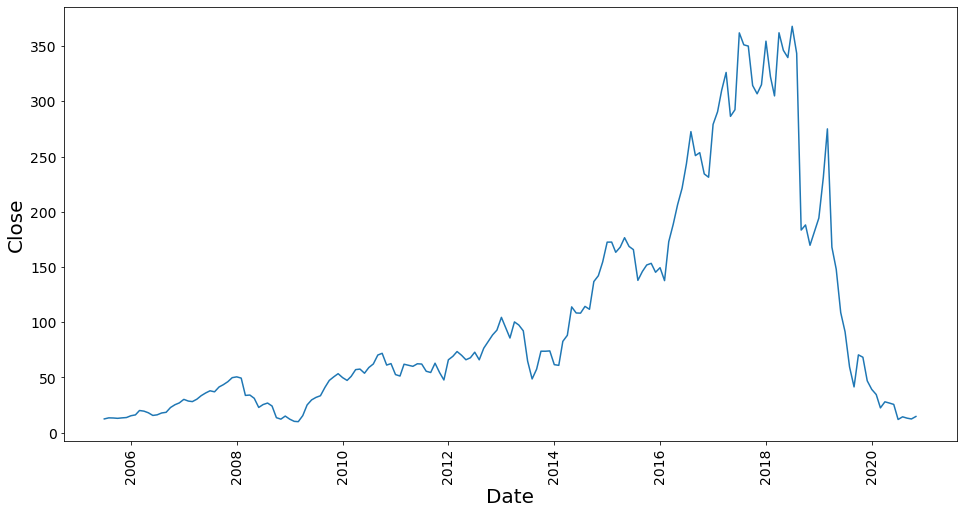

In [ ]:
#figure size
plt.figure(figsize=(16,8))

#Plotting date vs close price graph
sns.lineplot(x=df['Date'], y=df['Close'])

#labelling
plt.xlabel('Date', fontsize= 20)
plt.ylabel('Close', fontsize= 20)

#font size of numbers
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

The above graph shows the variation of closing price of yes bank stock price with respect to date. the peak closing price is in the year of 2019.

##Plot of all the Prices against Date

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 <a list of 11 Text major ticklabel objects>)

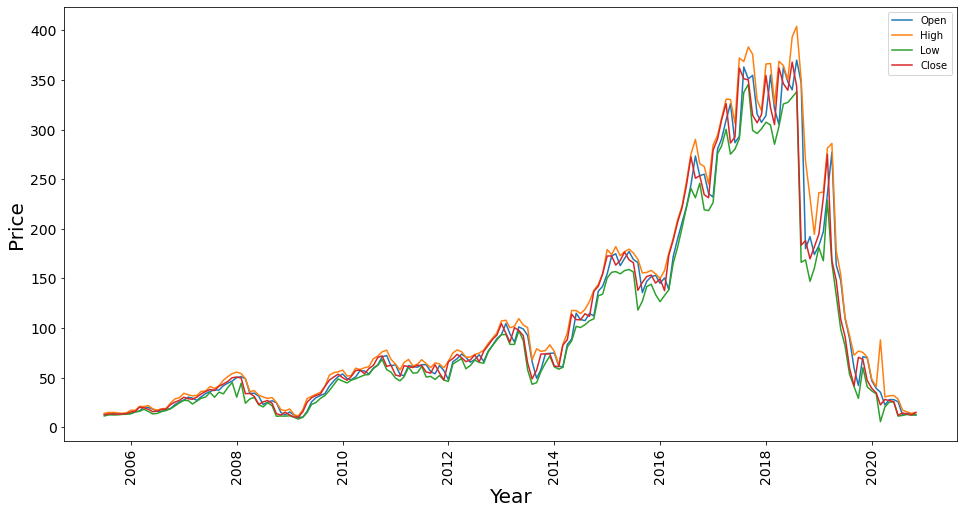

In [ ]:
#Grouping of all columns
all_plot =df.groupby(['Date']).agg({'Open':"sum",'High':"sum",'Low':"sum",'Close':"sum"})

#figure size
plt.figure(figsize=(16,8))

#plotting line graph
sns.lineplot(data=all_plot, dashes= False)

#labelling
plt.xlabel('Year', fontsize= 20)
plt.ylabel('Price', fontsize= 20)

#font size of numbers
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)


The above graph shows the variation of  opening price,high, low and close of stock price.

##Histogram of dependent variable "Close Price"

(array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 ]),
 <a list of 6 Text major ticklabel objects>)

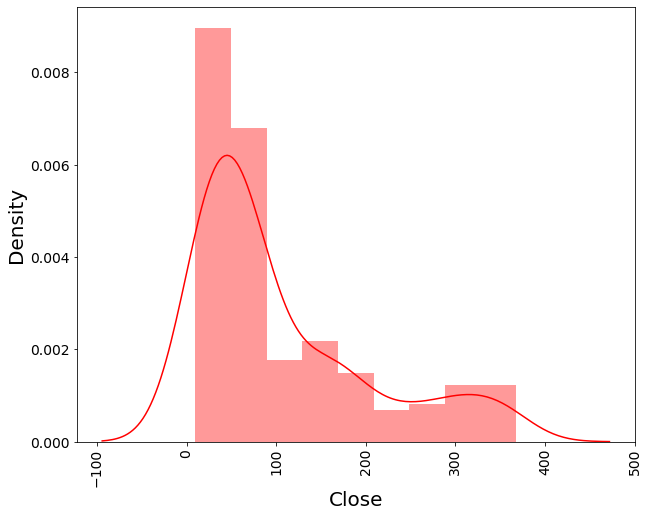

In [ ]:


#figure size
plt.figure(figsize=(10,8))

#PLotting histogram
sns.distplot(df['Close'], color= 'r')

#labelling
plt.xlabel('Close', fontsize= 20)
plt.ylabel('Density', fontsize= 20)

#font size of numbers
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

Above graph shows that data is positively skewed. applying log transformation to data to make it normal distribution.

##Applying Log Transformation in "Close Price"

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4]),
 <a list of 8 Text major ticklabel objects>)

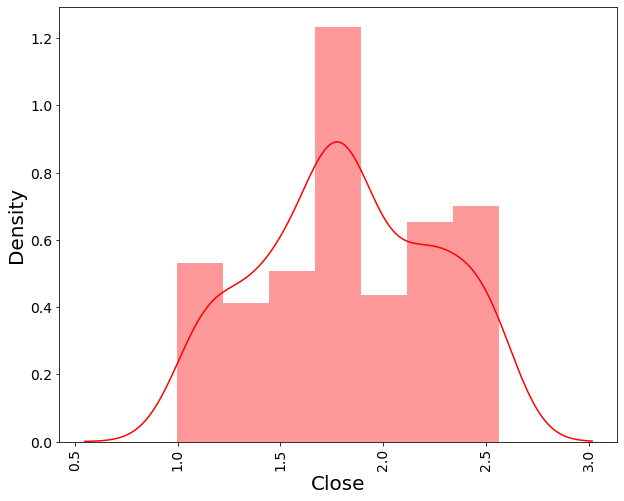

In [ ]:
#figure size
plt.figure(figsize=(10,8))

#plot after applying log 10
sns.distplot(np.log10(df['Close']), color= 'r')

#labelling
plt.xlabel('Close', fontsize= 20)
plt.ylabel('Density', fontsize= 20)

#font size of numbers
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

The above graph shows normal distribution of data.

##Histogram of Independent variable

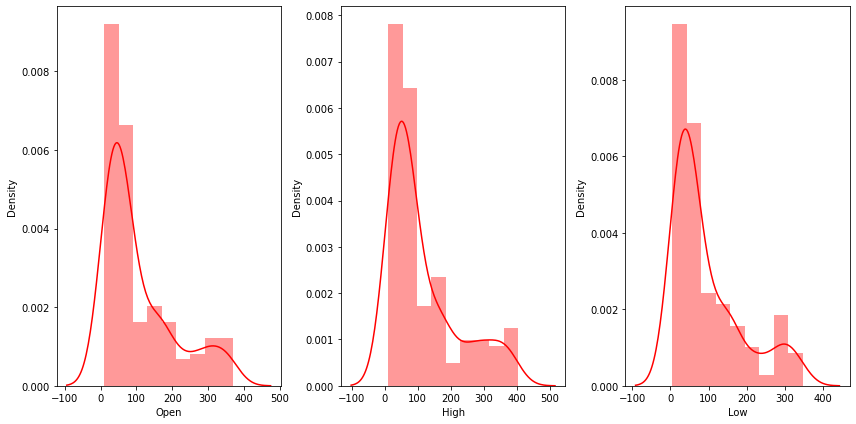

In [ ]:
# subplots and figure size
fig, axs = plt.subplots(ncols=3,figsize=(12,6))

#graph plot
sns.distplot(df['Open'], color='r', ax=axs[0])
sns.distplot(df['High'], color='r', ax=axs[1])
sns.distplot(df['Low'], color='r',ax=axs[2])

# this prevents plots from overlapping
plt.tight_layout()

The above histogram shows data distribution of open,high and low. the data is positively skewed.

##Applying log transformation in Independent variable

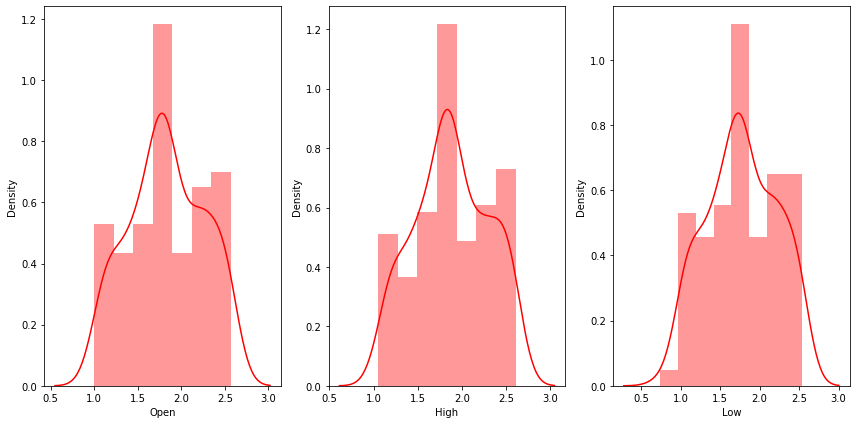

In [ ]:
# subplots and figure size
fig, axs = plt.subplots(ncols=3,figsize=(12,6))

#graph plot
sns.distplot(np.log10(df['Open']), color='r', ax=axs[0])
sns.distplot(np.log10(df['High']), color='r', ax=axs[1])
sns.distplot(np.log10(df['Low']), color='r',ax=axs[2])

# this prevents plots from overlapping
plt.tight_layout()

Now, the data is normal distributed after applying log transformation.

##Scatter Plot

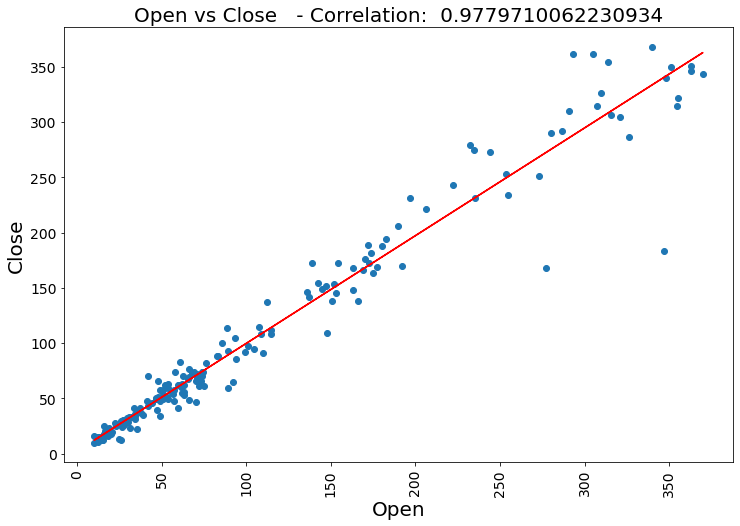

In [ ]:

stock_close=df['Close']
#correlation of Open and Close Price
correlation= df['Open'].corr(stock_close)

#figure size
fig = plt.figure(figsize=(12, 8))
ax = fig.gca()

#scatter plot
plt.scatter(x= df['Open'], y= df['Close'])

#title set
ax.set_title("Open vs Close" + "   - Correlation:  " + str(correlation), fontsize=20)

#labelling
plt.xlabel('Open', fontsize= 20)
plt.ylabel('Close', fontsize= 20)

#Font size of numbers
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

#best fit line
z = np.polyfit(df['Open'], df['Close'], 1)
y_hat = np.poly1d(z)(df["Open"])

plt.plot(df["Open"], y_hat, "r-", lw=1.5)

The above scatter plot shows the variation of yes bank stock open price against closing price. 'open price' is linearly correlated( correlation 0.9779) with the dependent variable (close price).



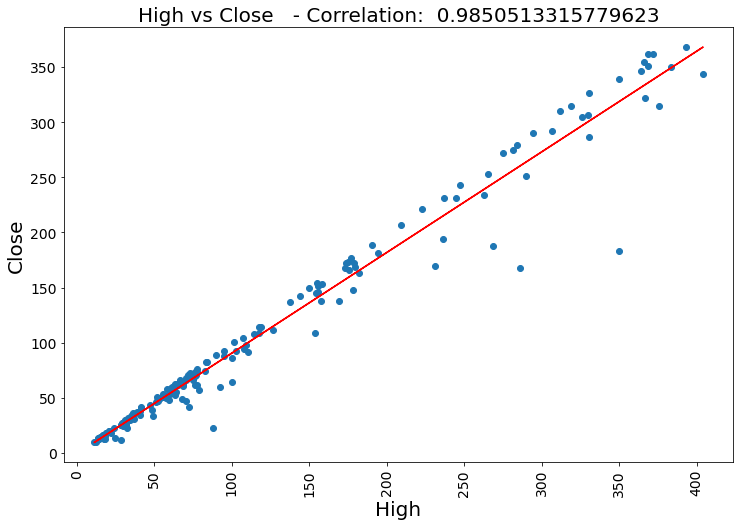

In [ ]:
stock_close=df['Close']

#correlation of High and Close Price
correlation= df['High'].corr(stock_close)

#figure size
fig = plt.figure(figsize=(12, 8))
ax = fig.gca()

#scatter plot
plt.scatter(x= df['High'], y= df['Close'])

#setting title
ax.set_title("High vs Close" + "   - Correlation:  " + str(correlation), fontsize=20)

#labelling
plt.xlabel('High', fontsize= 20)
plt.ylabel('Close', fontsize= 20)

#fontsize
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

#best fit line
z = np.polyfit(df['High'], df['Close'], 1)
y_hat = np.poly1d(z)(df["High"])

plt.plot(df["High"], y_hat, "r-", lw=1.5)



The above scatter plot shows the variation of yes bank stock 'high price' against closing price. The 'High price' is linearly correlated (0.9850) with the dependent variable (close price).


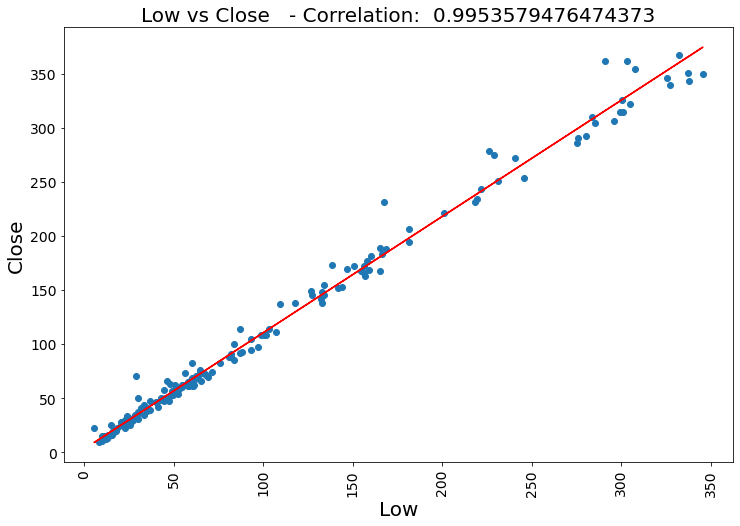

In [ ]:
stock_close=df['Close']

#correlation of Low and Close Price
correlation= df['Low'].corr(stock_close)

#figure size
fig = plt.figure(figsize=(12, 8))
ax = fig.gca()

#scatter plot
plt.scatter(x= df['Low'], y= df['Close'])

#setting title
ax.set_title("Low vs Close" + "   - Correlation:  " + str(correlation), fontsize=20)

#labelling
plt.xlabel('Low', fontsize= 20)
plt.ylabel('Close', fontsize= 20)

#fontsize
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

#best fit line
z = np.polyfit(df['Low'], df['Close'], 1)
y_hat = np.poly1d(z)(df["Low"])

plt.plot(df["Low"], y_hat, "r-", lw=1.5)



The above scatter plot shows the variation of yes bank stock 'low price' against 'close price'. The 'High price' is linearly correlated (0.9953) with the dependent variable (close price).

##Correlation 

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text major ticklabel objects>)

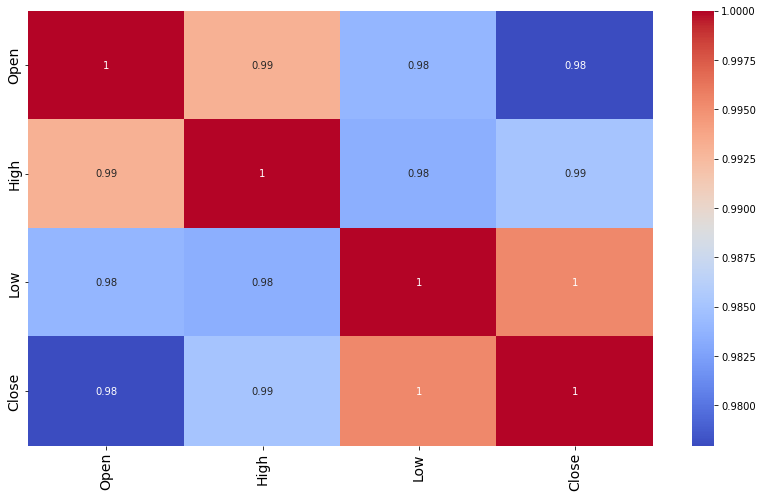

In [ ]:
#figure size of graph
plt.figure(figsize=(14,8))

#correlation
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

#font size of numbers
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

* The above heaatmap shows the high correlation between independent variables open,high and low with dependent variable close price.
* Data is highly correlated,multicollinearity may present. Hence finding VIF(variance inflation factor)







In [ ]:
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [ ]:
calc_vif(df.drop(columns=['Close','Date']))

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137




*   Even though we have high VIF in our dataset we cant perform feature engineering because features are important and limited.
*  All this features are required to predict future values.



#Model

##Transforming & Spliting Data

x = Independant Variable


y = Dependent Variable 

In [ ]:
# Splitting data into Dependent and Independent Variables
x = df.drop(columns=['Close','Date'])
y = df['Close']

Data is positively skewed so we have to appply normalization to make  the features to common scale. Data must be normally distributed.

In [ ]:
# Data transformation
from scipy.stats import zscore
x = x.apply(zscore)
y = np.log10(y)

##Train-test split

###Training set = 80% 

###Test set = 20%

In [ ]:
# Spliting Data into Testing and Training Datasets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 1)

In [ ]:
x_train[0:10]

,Open,High,Low
59,-0.495287,-0.530001,-0.465501
73,-0.432415,-0.491716,-0.488475
120,0.643516,0.560849,0.676052
145,2.610818,2.380253,2.664784
118,0.653657,0.573863,0.690892
17,-0.812692,-0.815161,-0.775485
5,-0.933468,-0.958684,-0.900797
130,0.854444,0.875996,0.948991
122,0.304917,0.371497,0.352328
91,-0.011473,-0.078309,-0.017014


In [ ]:
x_test[0:10]

,Open,High,Low
16,-0.839058,-0.826382,-0.808462
179,-0.788862,-0.793566,-0.762844
66,-0.431604,-0.495676,-0.500787
40,-0.920285,-0.926999,-0.920034
166,0.585714,0.584141,0.418831
155,2.458707,2.206555,2.554641
97,-0.400979,-0.455410,-0.568609
177,-0.844128,-0.807711,-0.820553
35,-0.753673,-0.791020,-0.795051
54,-0.526724,-0.551878,-0.533434


In [ ]:
#shape of training dataset.
x_train.shape

(148, 3)

In [ ]:
#shape of testing dataset.
x_test.shape

(37, 3)

##1.Linear Regression

In [ ]:
#fitting Linear Regression into training set
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [ ]:
regression.intercept_

1.8292785179315048

In [ ]:
regression.coef_

array([-0.04654099,  0.19795929,  0.23173905])

In [ ]:
#train accuracy of linear regression model
round(regression.score(x_train,y_train), 3)

0.815

In [ ]:
#test accuracy of linear regression model
round(regression.score(x_test,y_test), 3)

0.823

In [ ]:
#actual close price on test data
np.array (y_test )

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [ ]:
#predicted close price of test data.
y_pred = regression.predict(x_test)
y_pred

array([1.51738682, 1.53211837, 1.63519027, 1.47539354, 2.01471458,
       2.74366588, 1.62601875, 1.51851685, 1.52352095, 1.62092587,
       2.07716025, 1.61560053, 1.47290774, 2.63685207, 1.70384859,
       1.61032504, 1.52501328, 1.95399032, 1.81967493, 1.76423173,
       1.53162271, 1.480381  , 1.83883617, 1.6394682 , 2.05986731,
       1.49003242, 1.4767562 , 1.61402383, 1.53535964, 1.66894676,
       2.4177132 , 2.75914846, 1.68261819, 2.34869197, 1.78260049,
       1.62415017, 2.34100799])

###Performance metrics of Linear Regression model

In [ ]:
#Performance metrics of linear regression
Train_score = round(regression.score(x_train,y_train), 3)
Test_score = round(regression.score(x_test,y_test), 3)
MSE = round(mean_squared_error(y_test, y_pred), 3)
RMSE = round(math.sqrt(mean_squared_error(y_test, y_pred)),3)
MAE = round(mean_absolute_error(y_test, y_pred),3)
MAPE = round(mean_absolute_percentage_error(y_test, y_pred),3)
R2 = round(r2_score(y_test, y_pred), 3)
print('Train score :', Train_score)
print('Test score : ', Test_score)
print("Mean Squared Error :", MSE)
print("Root Mean Squared Error :", RMSE)
print("Mean Absolute Error :", MAE)
print("Mean Absolute Percentage Error :", MAPE)
print("R2 Score :", R2)

Train score : 0.815
Test score :  0.823
Mean Squared Error : 0.032
Root Mean Squared Error : 0.178
Mean Absolute Error : 0.151
Mean Absolute Percentage Error : 0.095
R2 Score : 0.823


In [ ]:
i=0
perform = pd.DataFrame()

perform.loc[i,'Model']= 'Linear regression'
perform.loc[i,"Train score"]= round(Train_score,3)
perform.loc[i,"Test score"]= round(Test_score,3)
perform.loc[i,"MSE"]=round(MSE,3)
perform.loc[i,"RMSE"]=round(RMSE,3)
perform.loc[i,"MAE"]=round(MAE,3)
perform.loc[i,"MAPE"]=round(MAPE,3)
perform.loc[i,"R2 Score"]= round(R2,3)

i= i+1
perform

,Model,Train score,Test score,MSE,RMSE,MAE,MAPE,R2 Score
0,Linear regression,0.815,0.823,0.032,0.178,0.151,0.095,0.823


###Plot of Predicted Close Price against Actual Close Price of Linear Regression

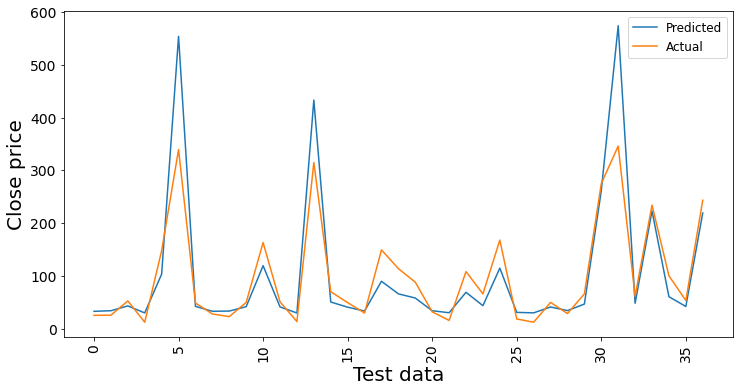

In [ ]:
#figure size
plt.figure(figsize=(12,6))

#plot
sns.lineplot(data=10**y_pred)
sns.lineplot(data=10**(np.array (y_test)))

#labelling
plt.xlabel('Test data', fontsize= 20)
plt.ylabel('Close price', fontsize= 20)

#font size
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['Predicted','Actual'], fontsize = 12)

*  We can see the difference between actual price and predicted price.
*  Differences are comparitively high at peak point.

##2. Lasso Regression

In [ ]:
#fitting lasso regression to training set
lasso_reg = Lasso(alpha=0.0005, max_iter = 3000)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.0005, max_iter=3000)

In [ ]:
# Accuracy of lasso regression model
round(lasso_reg.score (x_train, y_train),4)

0.8145

similar accuracy as linear regression

In [ ]:
lasso_reg.coef_

array([0.        , 0.16116   , 0.22143765])

In [ ]:
#predicted close price of test data.
y_pred_lasso=lasso_reg.predict(x_test)
y_pred_lasso

array([1.5168459 , 1.53225765, 1.63842894, 1.47586962, 2.01656377,
       2.7519968 , 1.62987601, 1.51717429, 1.52552322, 1.6221236 ,
       2.080486  , 1.61587578, 1.47388369, 2.63959631, 1.70561621,
       1.61170831, 1.52471639, 1.95766416, 1.81229851, 1.76283206,
       1.53234182, 1.48202489, 1.84034685, 1.63493146, 2.06096088,
       1.49104589, 1.47725162, 1.61321706, 1.53629424, 1.67221802,
       2.40705876, 2.76971786, 1.68573191, 2.35515183, 1.77961602,
       1.6245353 , 2.33700835])

In [ ]:
#actual close price on test data
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

###Performance Metrics of Lasso Regression model

In [ ]:
#Performance metrics of linear regression
Train_score_lasso = round(lasso_reg.score(x_train,y_train), 3)
Test_score_lasso = round(lasso_reg.score(x_test,y_test), 3)
MSE_lasso = round(mean_squared_error(y_test, y_pred_lasso), 3)
RMSE_lasso = round(math.sqrt(mean_squared_error(y_test, y_pred_lasso)),3)
MAE_lasso = round(mean_absolute_error(y_test, y_pred_lasso),3)
MAPE_lasso = round(mean_absolute_percentage_error(y_test, y_pred_lasso),3)
R2_lasso = round(r2_score(y_test, y_pred_lasso), 3)
print('Train score :', Train_score_lasso)
print('Test score : ', Test_score_lasso)
print("Mean Squared Error :", MSE_lasso)
print("Root Mean Squared Error :", RMSE_lasso)
print("Mean Absolute Error :", MAE_lasso)
print("Mean Absolute Percentage Error :", MAPE_lasso)
print("R2 Score :", R2_lasso)

Train score : 0.814
Test score :  0.821
Mean Squared Error : 0.032
Root Mean Squared Error : 0.179
Mean Absolute Error : 0.152
Mean Absolute Percentage Error : 0.096
R2 Score : 0.821


In [ ]:
perform.loc[i,'Model']= 'Lasso regression'
perform.loc[i,"Train score"]= round(Train_score_lasso,3)
perform.loc[i,"Test score"]= round(Test_score_lasso,3)
perform.loc[i,"MSE"]=round(MSE_lasso,3)
perform.loc[i,"RMSE"]=round(RMSE_lasso,3)
perform.loc[i,"MAE"]=round(MAE_lasso,3)
perform.loc[i,"MAPE"]=round(MAPE_lasso,3)
perform.loc[i,"R2 Score"]= round(R2_lasso,3)

i= i+1
perform

,Model,Train score,Test score,MSE,RMSE,MAE,MAPE,R2 Score
0,Linear regression,0.815,0.823,0.032,0.178,0.151,0.095,0.823
1,Lasso regression,0.814,0.821,0.032,0.179,0.152,0.096,0.821


###Plot of Predicted Close Price against Actual Close Price of Lasso Regression

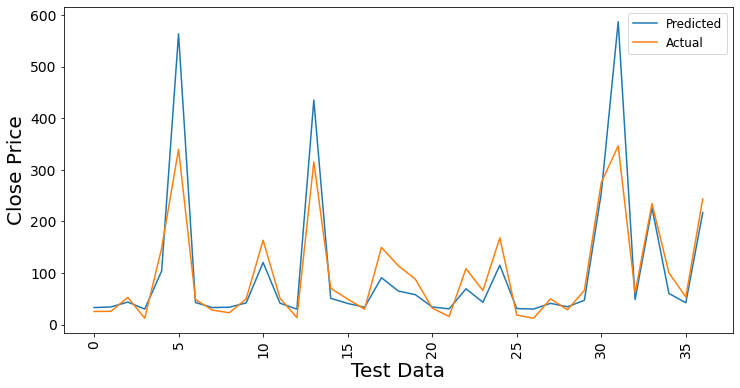

In [ ]:
#figure size
plt.figure(figsize=(12,6))

#plot
sns.lineplot(data=10**y_pred_lasso)
sns.lineplot(data=10**(np.array (y_test)))


#labelling
plt.xlabel('Test Data', fontsize= 20)
plt.ylabel('Close Price', fontsize= 20)

#font size
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

plt.legend(['Predicted','Actual'], fontsize = 12)

The graph shows same characteristics that of a linear regression, there is a difference between actual and predicted values and also peak has high values in predicted set.

##Cross Validation of Lasso Regression


In [ ]:
# Hyper parameter of Tuning For Lasso Regression
lasso_cross=Lasso()
parameters ={'alpha': [1e-15, 1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso_cross, parameters,scoring = 'neg_mean_squared_error', cv = 3, return_train_score=True)
lasso_regressor.fit(x_train, y_train)


GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
#best fit alpha value
print(" The best Fit alpha value is found out to be :", round(lasso_regressor.best_params_['alpha'], 4))
print(" The negative mean squared error is : ", round(lasso_regressor. best_score_,4))

 The best Fit alpha value is found out to be : 0.01
 The negative mean squared error is :  -0.0352


In [ ]:
#predicted close price of test data.
y_pred_lasso1 = lasso_regressor.predict(x_test)
y_pred_lasso1

array([1.5246758 , 1.53967822, 1.64330447, 1.48473667, 2.01244712,
       2.7285637 , 1.63520241, 1.52506422, 1.53318726, 1.62734999,
       2.07429343, 1.62111986, 1.48267825, 2.61894213, 1.7086131 ,
       1.61716593, 1.53236729, 1.9545761 , 1.81309013, 1.76452438,
       1.53980312, 1.49069997, 1.84005176, 1.64003515, 2.05511403,
       1.49942522, 1.48609019, 1.6186234 , 1.54359818, 1.67617522,
       2.39311476, 2.74618564, 1.68942791, 2.34233898, 1.78097189,
       1.62960909, 2.32426455])

In [ ]:
#actual close price on test data
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

###Performance Metrics of Lasso Regression after Validation

In [ ]:
#Performance metrics of linear regression

MSE_lasso1 = round(mean_squared_error(y_test, y_pred_lasso1), 3)
RMSE_lasso1 = round(math.sqrt(mean_squared_error(y_test, y_pred_lasso1)),3)
MAE_lasso1 = round(mean_absolute_error(y_test, y_pred_lasso1),3)
MAPE_lasso1 = round(mean_absolute_percentage_error(y_test, y_pred_lasso1),3)
R2_lasso1 = round(r2_score(y_test, y_pred_lasso1), 3)
print("Mean Squared Error :", MSE_lasso1)
print("Root Mean Squared Error :", RMSE_lasso1)
print("Mean Absolute Error :", MAE_lasso1)
print("Mean Absolute Percentage Error :", MAPE_lasso1)
print("R2 Score :", R2_lasso1)

Mean Squared Error : 0.032
Root Mean Squared Error : 0.18
Mean Absolute Error : 0.153
Mean Absolute Percentage Error : 0.097
R2 Score : 0.819


In [ ]:
perform.loc[i,'Model']= 'Lasso after validation'

perform.loc[i,"MSE"]=round(MSE_lasso1,3)
perform.loc[i,"RMSE"]=round(RMSE_lasso1,3)
perform.loc[i,"MAE"]=round(MAE_lasso1,3)
perform.loc[i,"MAPE"]=round(MAPE_lasso1,3)
perform.loc[i,"R2 Score"]= round(R2_lasso1,3)

i= i+1
perform

,Model,Train score,Test score,MSE,RMSE,MAE,MAPE,R2 Score
0,Linear regression,0.815,0.823,0.032,0.178,0.151,0.095,0.823
1,Lasso regression,0.814,0.821,0.032,0.179,0.152,0.096,0.821
2,Lasso after validation,NaN,NaN,0.032,0.180,0.153,0.097,0.819


###Plot of Predicted Close Price against Actual Close Price of Lasso Regression after Validation

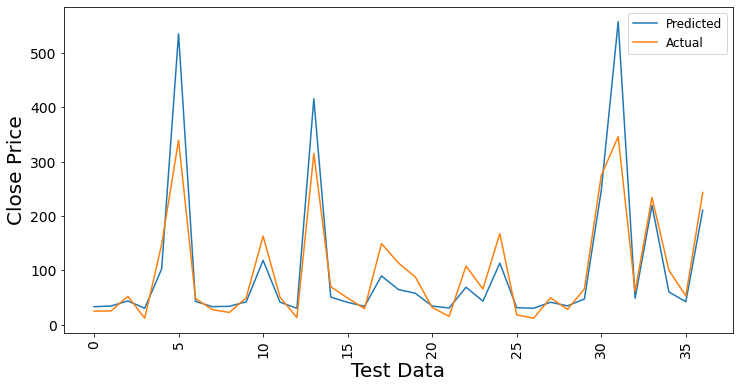

In [ ]:
#figure size
plt.figure(figsize=(12,6))

#plot
sns.lineplot(data=10**y_pred_lasso1)
sns.lineplot(data=10**(np.array (y_test)))


#labelling
plt.xlabel('Test Data', fontsize= 20)
plt.ylabel('Close Price', fontsize= 20)

#font size
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

#legends
plt.legend(['Predicted','Actual'], fontsize = 12)

After applying cross validation there is small increase in accuracy

##3. Ridge regression

In [ ]:
# fit ridge regression into training set
from sklearn.linear_model import Ridge

ridge_reg = Ridge (alpha= 0.1)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=0.1)

In [ ]:
# Accuracy of Ridge regression model
round(ridge_reg.score(x_train, y_train), 4)

0.8147

In [ ]:
# predicted close price on test data
y_pred_ridge = ridge_reg.predict(x_test)
y_pred_ridge

array([1.51725986, 1.53215164, 1.63600352, 1.47552735, 2.01524649,
       2.74546591, 1.6270459 , 1.51820847, 1.52403533, 1.62122179,
       2.07792883, 1.61563413, 1.47313494, 2.63727671, 1.7042382 ,
       1.61066104, 1.5249501 , 1.95487086, 1.81790128, 1.76386063,
       1.53181029, 1.48079356, 1.8391624 , 1.63839195, 2.06005015,
       1.49026998, 1.47689613, 1.61381392, 1.53558533, 1.66974486,
       2.41507786, 2.76158664, 1.68339463, 2.35025992, 1.78185548,
       1.62422136, 2.33989198])

In [ ]:
#actual close price on test data
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

###Performance Metrics of Ridge Regression

In [ ]:
# Test Performance
Train_score_ridge = round(ridge_reg.score(x_train,y_train), 3)
Test_score_ridge = round(ridge_reg.score(x_test,y_test), 3)
MSE_ridge = round(mean_squared_error(y_test, y_pred_ridge), 3)
RMSE_ridge = round(math.sqrt(mean_squared_error(y_test, y_pred_ridge)),3)
MAE_ridge = round(mean_absolute_error(y_test, y_pred_ridge),3)
MAPE_ridge = round(mean_absolute_percentage_error(y_test, y_pred_ridge),3)
R2_ridge = round(r2_score(y_test, y_pred_ridge), 3)
print('Train score :', Train_score_ridge)
print('Test score : ', Test_score_ridge)
print("Mean Squared Error :", MSE_ridge)
print("Root Mean Squared Error :", RMSE_ridge)
print("Mean Absolute Error :", MAE_ridge)
print("Mean Absolute Percentage Error :", MAPE_ridge)
print("R2 Score :", R2_ridge)

Train score : 0.815
Test score :  0.822
Mean Squared Error : 0.032
Root Mean Squared Error : 0.178
Mean Absolute Error : 0.151
Mean Absolute Percentage Error : 0.095
R2 Score : 0.822


In [ ]:
perform.loc[i,'Model']= 'Ridge regression'
perform.loc[i,"Train score"]= round(Train_score_ridge,3)
perform.loc[i,"Test score"]= round(Test_score_ridge,3)
perform.loc[i,"MSE"]=round(MSE_ridge,3)
perform.loc[i,"RMSE"]=round(RMSE_ridge,3)
perform.loc[i,"MAE"]=round(MAE_ridge,3)
perform.loc[i,"MAPE"]=round(MAPE_ridge,3)
perform.loc[i,"R2 Score"]= round(R2_ridge,3)

i= i+1
perform

,Model,Train score,Test score,MSE,RMSE,MAE,MAPE,R2 Score
0,Linear regression,0.815,0.823,0.032,0.178,0.151,0.095,0.823
1,Lasso regression,0.814,0.821,0.032,0.179,0.152,0.096,0.821
2,Lasso after validation,NaN,NaN,0.032,0.180,0.153,0.097,0.819
3,Ridge regression,0.815,0.822,0.032,0.178,0.151,0.095,0.822


###Plot of Predicted Close Price against Actual Close Price of Ridge regression

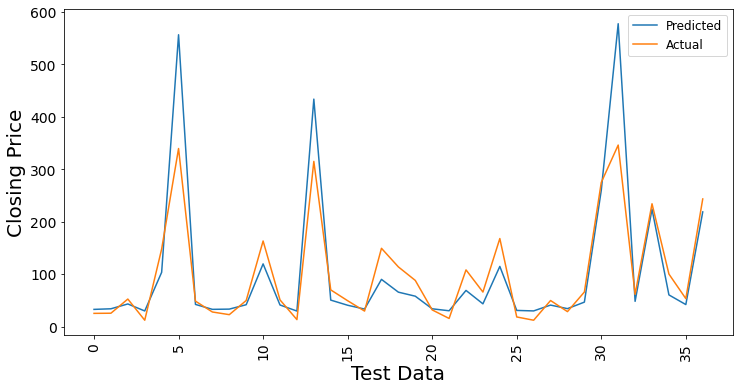

In [ ]:
#figure size
plt.figure(figsize=(12,6))

#plot
sns.lineplot(data=10**y_pred_ridge)
sns.lineplot(data=10**(np.array (y_test)))

#labelling
plt.xlabel('Test Data', fontsize= 20)
plt.ylabel('Closing Price', fontsize= 20)

#font size
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

#legends
plt.legend(['Predicted','Actual'], fontsize = 12)

##Cross validation on Ridge Regression


In [ ]:
# Hyperparameter tunning
ridge_cross = Ridge()
parameters = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}
ridge_regressor = GridSearchCV(ridge_cross, parameters, scoring = 'neg_mean_squared_error', cv=3)


In [ ]:
#data fit
ridge_regressor.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
#print best fit values of alpha
print(" The Best Fit Alpha Value is found out to be :", ridge_regressor.best_params_['alpha'])
print(" The negative mean squared error for is :", round(ridge_regressor.best_score_, 3))

 The Best Fit Alpha Value is found out to be : 10
 The negative mean squared error for is : -0.035


In [ ]:
# Prediction on test data
y_pred_ridge1 = ridge_regressor.predict(x_test)
y_pred_ridge1

array([1.52133054, 1.53728128, 1.64940763, 1.4839079 , 2.02368702,
       2.73378721, 1.64726711, 1.5213362 , 1.53624874, 1.6280259 ,
       2.07922307, 1.61714065, 1.48054103, 2.61189076, 1.70753952,
       1.61769429, 1.52987123, 1.96119864, 1.80123808, 1.75900482,
       1.53947926, 1.49160849, 1.83960113, 1.63228305, 2.05254637,
       1.49759728, 1.48541775, 1.61420655, 1.54258389, 1.68083452,
       2.37546978, 2.76285145, 1.69521298, 2.35812164, 1.77364892,
       1.62674463, 2.3102558 ])

In [ ]:
# test data
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

###Performance Metrics of Ridge Regression after Validation

In [ ]:
# Test Performance
MSE_ridge1 = round(mean_squared_error(y_test, y_pred_ridge1), 3)
RMSE_ridge1 = round(math.sqrt(mean_squared_error(y_test, y_pred_ridge1)),3)
MAE_ridge1 = round(mean_absolute_error(y_test, y_pred_ridge1),3)
MAPE_ridge1 = round(mean_absolute_percentage_error(y_test, y_pred_ridge1),3)
R2_ridge1 = round(r2_score(y_test, y_pred_ridge1), 3)
print("Mean Squared Error :", MSE_ridge1)
print("Root Mean Squared Error :", RMSE_ridge1)
print("Mean Absolute Error :", MAE_ridge1)
print("Mean Absolute Percentage Error :", MAPE_ridge1)
print("R2 Score :", R2_ridge1)

Mean Squared Error : 0.033
Root Mean Squared Error : 0.18
Mean Absolute Error : 0.153
Mean Absolute Percentage Error : 0.097
R2 Score : 0.817


In [ ]:
perform.loc[i,'Model']= 'Ridge after validation'

perform.loc[i,"MSE"]=round(MSE_ridge,3)
perform.loc[i,"RMSE"]=round(RMSE_ridge,3)
perform.loc[i,"MAE"]=round(MAE_ridge,3)
perform.loc[i,"MAPE"]=round(MAPE_ridge,3)
perform.loc[i,"R2 Score"]= round(R2_ridge,3)

i= i+1
perform

,Model,Train score,Test score,MSE,RMSE,MAE,MAPE,R2 Score
0,Linear regression,0.815,0.823,0.032,0.178,0.151,0.095,0.823
1,Lasso regression,0.814,0.821,0.032,0.179,0.152,0.096,0.821
2,Lasso after validation,NaN,NaN,0.032,0.180,0.153,0.097,0.819
3,Ridge regression,0.815,0.822,0.032,0.178,0.151,0.095,0.822
4,Ridge after validation,NaN,NaN,0.032,0.178,0.151,0.095,0.822


###Plot of Predicted Close Price against Actual Close Price of Ridge Regression after validation

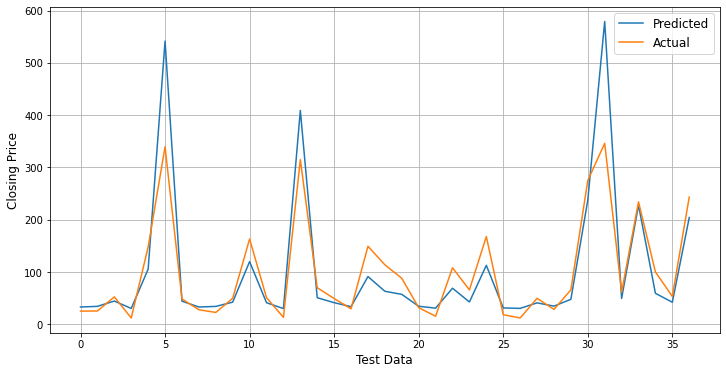

In [ ]:
#figure size
plt.figure(figsize=(12,6))

#plot
plt.plot(10**(y_pred_ridge1))
plt.plot(10**(np.array(y_test)))

#legend
plt.legend(['Predicted','Actual'], fontsize = 12)

#
plt.xlabel('Test Data', fontsize= 12)
plt.ylabel('Closing Price', fontsize= 12)
plt.grid()

##4.Elastic Net Regression

In [ ]:
#fitting data into Elastic Net
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.1,l1_ratio=0.05)
elastic_model = elastic.fit(x_train,y_train)

In [ ]:
#accuracy of elastic net model
round(elastic.score(x_train,y_train),4)

0.8107

In [ ]:
#predicting the test_set values
y_pred_elastic = elastic.predict(x_test)
y_pred_elastic

array([1.52800375, 1.54363084, 1.6538612 , 1.49157484, 2.02054843,
       2.71355776, 1.65234854, 1.52805366, 1.5430137 , 1.63258347,
       2.07401048, 1.62153343, 1.48808712, 2.59363093, 1.71008334,
       1.62244504, 1.53642106, 1.95874914, 1.80151498, 1.76026465,
       1.54594285, 1.49916803, 1.83931208, 1.63644638, 2.04735111,
       1.50479474, 1.4930661 , 1.61873283, 1.54888066, 1.6844312 ,
       2.36273808, 2.742979  , 1.69862987, 2.34756703, 1.77455824,
       1.63103362, 2.29865142])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

###Performance Metrics of Elastic Net Regression

In [ ]:
# Test Performance
Train_score_elastic = round(elastic.score(x_train,y_train), 3)
Test_score_elastic = round(elastic.score(x_test,y_test), 3)
MSE_elastic = round(mean_squared_error(y_test, y_pred_elastic), 3)
RMSE_elastic = round(math.sqrt(mean_squared_error(y_test, y_pred_elastic)),3)
MAE_elastic = round(mean_absolute_error(y_test, y_pred_elastic),3)
MAPE_elastic = round(mean_absolute_percentage_error(y_test, y_pred_elastic),3)
R2_elastic = round(r2_score(y_test, y_pred_elastic), 3)
print('Train score :', Train_score_elastic)
print('Test score : ', Test_score_elastic)
print("Mean Squared Error :", MSE_elastic)
print("Root Mean Squared Error :", RMSE_elastic)
print("Mean Absolute Error :", MAE_elastic)
print("Mean Absolute Percentage Error :", MAPE_elastic)
print("R2 Score :", R2_elastic)

Train score : 0.811
Test score :  0.815
Mean Squared Error : 0.033
Root Mean Squared Error : 0.181
Mean Absolute Error : 0.154
Mean Absolute Percentage Error : 0.098
R2 Score : 0.815


In [ ]:
perform.loc[i,'Model']= 'Elastic Net'
perform.loc[i,"Train score"]= round(Train_score_elastic,3)
perform.loc[i,"Test score"]= round(Test_score_elastic,3)
perform.loc[i,"MSE"]=round(MSE_elastic,3)
perform.loc[i,"RMSE"]=round(RMSE_elastic,3)
perform.loc[i,"MAE"]=round(MAE_elastic,3)
perform.loc[i,"MAPE"]=round(MAPE_elastic,3)
perform.loc[i,"R2 Score"]= round(R2_elastic,3)

i= i+1
perform

,Model,Train score,Test score,MSE,RMSE,MAE,MAPE,R2 Score
0,Linear regression,0.815,0.823,0.032,0.178,0.151,0.095,0.823
1,Lasso regression,0.814,0.821,0.032,0.179,0.152,0.096,0.821
2,Lasso after validation,NaN,NaN,0.032,0.180,0.153,0.097,0.819
3,Ridge regression,0.815,0.822,0.032,0.178,0.151,0.095,0.822
4,Ridge after validation,NaN,NaN,0.032,0.178,0.151,0.095,0.822
5,Elastic Net,0.811,0.815,0.033,0.181,0.154,0.098,0.815


###Plot of Predicted Close Price against Actual Close Price of Elastic Net regression

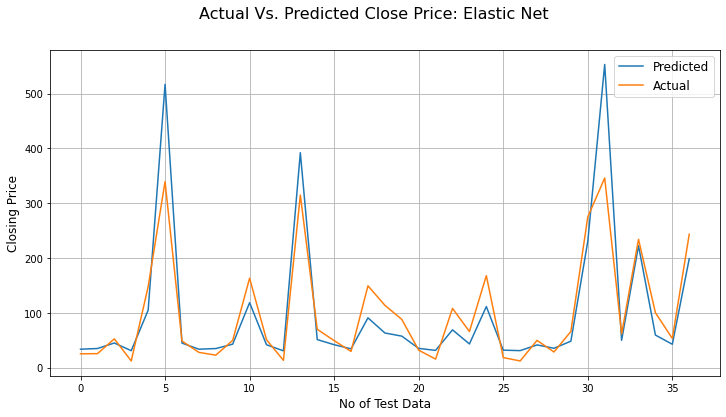

In [ ]:
# Actual Price vs. Predicted Price for Elastic Net Plotting
#figure size
plt.figure(figsize=(12,6))

#plot
plt.plot(10**(y_pred_elastic))
plt.plot(10**(np.array(y_test)))

#title
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Net', fontsize=16)

#legends
plt.legend(['Predicted', 'Actual'], fontsize=12)

#labelling
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)

#gridlines
plt.grid()

##Cross Validation on Elastic Net Regression

In [ ]:
# Hyper-Parameter Tuning for Elastic Net

elastic_cross = ElasticNet()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,1,2]}
elastic_model= GridSearchCV(elastic_cross, parameters, scoring='neg_mean_squared_error',cv=3)
elastic_model.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 2]},
             scoring='neg_mean_squared_error')

In [ ]:
#the best fit alpha value
print("The best fit alpha value is found out to be :" ,elastic_model.best_params_['alpha'])
print("L1 ratio value is found out to be : ",elastic_model.best_params_['l1_ratio'])
print("The negative mean squared error for is: ", round(elastic_model.best_score_,3))

The best fit alpha value is found out to be : 0.01
L1 ratio value is found out to be :  1
The negative mean squared error for is:  -0.035


In [ ]:
y_pred_elastic1 = elastic_model.predict(x_test)
y_pred_elastic1

array([1.5246758 , 1.53967822, 1.64330447, 1.48473667, 2.01244712,
       2.7285637 , 1.63520241, 1.52506422, 1.53318726, 1.62734999,
       2.07429343, 1.62111986, 1.48267825, 2.61894213, 1.7086131 ,
       1.61716593, 1.53236729, 1.9545761 , 1.81309013, 1.76452438,
       1.53980312, 1.49069997, 1.84005176, 1.64003515, 2.05511403,
       1.49942522, 1.48609019, 1.6186234 , 1.54359818, 1.67617522,
       2.39311476, 2.74618564, 1.68942791, 2.34233898, 1.78097189,
       1.62960909, 2.32426455])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

###Performance Metrics of Elastic Net Regression after Validation

In [ ]:
# Test Performance
MSE_elastic1 = round(mean_squared_error(y_test, y_pred_elastic1), 3)
RMSE_elastic1 = round(math.sqrt(mean_squared_error(y_test, y_pred_elastic1)),3)
MAE_elastic1 = round(mean_absolute_error(y_test, y_pred_elastic1),3)
MAPE_elastic1 = round(mean_absolute_percentage_error(y_test, y_pred_elastic1),3)
R2_elastic1 = round(r2_score(y_test, y_pred_elastic1), 3)
print("Mean Squared Error :", MSE_elastic1)
print("Root Mean Squared Error :", RMSE_elastic1)
print("Mean Absolute Error :", MAE_elastic1)
print("Mean Absolute Percentage Error :", MAPE_elastic1)
print("R2 Score :", R2_elastic1)

Mean Squared Error : 0.032
Root Mean Squared Error : 0.18
Mean Absolute Error : 0.153
Mean Absolute Percentage Error : 0.097
R2 Score : 0.819


In [ ]:
perform.loc[i,'Model']= 'Elastic Net after validation'

perform.loc[i,"MSE"]=round(MSE_elastic1,3)
perform.loc[i,"RMSE"]=round(RMSE_elastic1,3)
perform.loc[i,"MAE"]=round(MAE_elastic1,3)
perform.loc[i,"MAPE"]=round(MAPE_elastic1,3)
perform.loc[i,"R2 Score"]= round(R2_elastic1,3)

i= i+1
perform

,Model,Train score,Test score,MSE,RMSE,MAE,MAPE,R2 Score
0,Linear regression,0.815,0.823,0.032,0.178,0.151,0.095,0.823
1,Lasso regression,0.814,0.821,0.032,0.179,0.152,0.096,0.821
2,Lasso after validation,NaN,NaN,0.032,0.180,0.153,0.097,0.819
3,Ridge regression,0.815,0.822,0.032,0.178,0.151,0.095,0.822
4,Ridge after validation,NaN,NaN,0.032,0.178,0.151,0.095,0.822
5,Elastic Net,0.811,0.815,0.033,0.181,0.154,0.098,0.815
6,Elastic Net after validation,NaN,NaN,0.032,0.180,0.153,0.097,0.819


###Plot of Predicted Close Price against Actual Close Price of Elastic Net regression after Validation

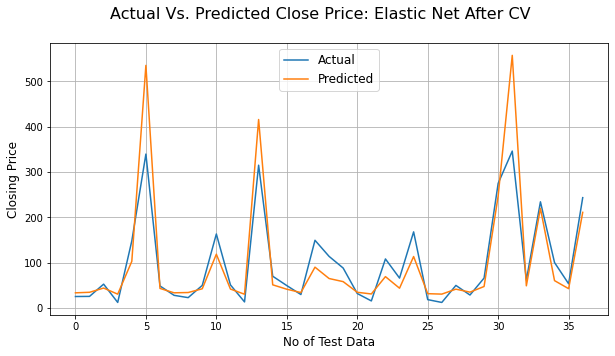

In [ ]:
# Actual Price vs. Predicted Price for Elastic Net after Validation Plotting 

#figure size
plt.figure(figsize=(10,5))

#plot
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_elastic1))

#title
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Net After CV', fontsize=16)

#legend
plt.legend(['Actual','Predicted'], fontsize=12)

#labelling
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)

#gridlines
plt.grid()

from the above graph, there is a difference between actual values and predicted values.

#Performance metrics comparison

In [ ]:
perform

,Model,Train score,Test score,MSE,RMSE,MAE,MAPE,R2 Score
0,Linear regression,0.815,0.823,0.032,0.178,0.151,0.095,0.823
1,Lasso regression,0.814,0.821,0.032,0.179,0.152,0.096,0.821
2,Lasso after validation,NaN,NaN,0.032,0.180,0.153,0.097,0.819
3,Ridge regression,0.815,0.822,0.032,0.178,0.151,0.095,0.822
4,Ridge after validation,NaN,NaN,0.032,0.178,0.151,0.095,0.822
5,Elastic Net,0.811,0.815,0.033,0.181,0.154,0.098,0.815
6,Elastic Net after validation,NaN,NaN,0.032,0.180,0.153,0.097,0.819
